# <p style="text-align: center;">Enterprise Data Science - COVID-19 Data Prototype</p>
# <p style="text-align: center;">SIR Model - Dashboard</p>

<div style="text-align: right"> 
Name : Aditya Kundalik Kokate <br>
Matriculation Number : 419334 <br>
</div>

In [1]:
## check some parameters
## depending where you launch your notebook, the relative path might not work
## you should start the notebook server from your base path
## when opening the notebook, typically your path will be ../ads_covid-19/notebooks
import os
if os.path.split(os.getcwd())[-1]=='notebooks':
    os.chdir("../")

'Your base path is at: '+os.path.split(os.getcwd())[-1]

'Your base path is at: ads_covid-19'

In [2]:
# importing all the required libraries

import numpy as np
import pandas as pd 

from datetime import datetime

from scipy import optimize
from scipy import integrate

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.graph_objs as go

import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output, State

import seaborn as sns

sns.set(style="whitegrid")

mpl.rcParams['figure.figsize'] = (16, 9)
pd.set_option('display.max_rows', 500)

# Data Understanding and Data Preparation


In [3]:
# try to parse the dates right at the beginning 
# it works out of the box if the date was stored ISO YYYY-MM-DD format


df_analyse=pd.read_csv('data/processed/COVID_small_flat_table.csv',sep=';')       ## this file has been generated from DATA PREPARATION NOTEBOOK
df_analyse.sort_values('date',ascending=True)


,date,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
0,2020-01-22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-01-23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2,2020-01-24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
3,2020-01-25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
4,2020-01-26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,2022-07-24,184587,304890,266839,45326,102301,11,8736,9507562,424400,...,967808,242691,11723,532902,10767948,672039,535,11849,328550,256254
915,2022-07-25,184819,305123,266916,45326,102301,11,8736,9507562,425365,...,967808,242747,11723,533195,10768844,672039,535,11849,329483,256270
916,2022-07-26,185086,306789,267010,45326,102301,11,8741,9507562,425365,...,969803,242811,11723,533195,10770304,682096,535,11849,329483,256284
917,2022-07-27,185272,308050,267096,45326,102301,11,8741,9507562,425365,...,969803,242879,11723,533379,10772980,682096,535,11849,329483,256315


# SIR Parameters

Initially, trying SIR simulation only for Germany. <br>
Beta is the infection rate and gamma is the recovery rate. <br>

In [4]:
# set some basic parameters
# beta/gamma is denoted as 'basic reproduction number'

N0=1000000 #max susceptible population
beta=0.4   # infection spread dynamics
gamma=0.1  # recovery rate

## beta/gamma is the basic reproduction number, <1 means no spread virus


# condition I0+S0+R0=N0
I0=df_analyse.Germany[35]
S0=N0-I0
R0=0

print('Number of infected person   :', I0)
print('Number of suspetible person :', S0)
print('Number of recovered person  :', R0)

Number of infected person   : 21
Number of suspetible person : 999979
Number of recovered person  : 0


In [5]:
def SIR_model(SIR,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        I: infected people
        R: recovered people
        beta: infection rate
        gamma: recovery rate
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R = SIR
    dS_dt = -beta*S*I/N0          #S*I is the 
    dI_dt = beta*S*I/N0-gamma*I
    dR_dt = gamma*I
    
    return([dS_dt,dI_dt,dR_dt])

# Simulative approach to calculate SIR curves

In [6]:
SIR=np.array([S0,I0,R0])

propagation_rates=pd.DataFrame(columns={'susceptible':S0,
                                        'infected':I0,
                                        'recoverd':R0})



for each_t in np.arange(100):
   
    new_delta_vec=SIR_model(SIR,beta,gamma)
   
    SIR=SIR+new_delta_vec
    
    propagation_rates=propagation_rates.append({'susceptible':SIR[0],
                                                'infected':SIR[1],
                                                'recovered':SIR[2]}, ignore_index=True)


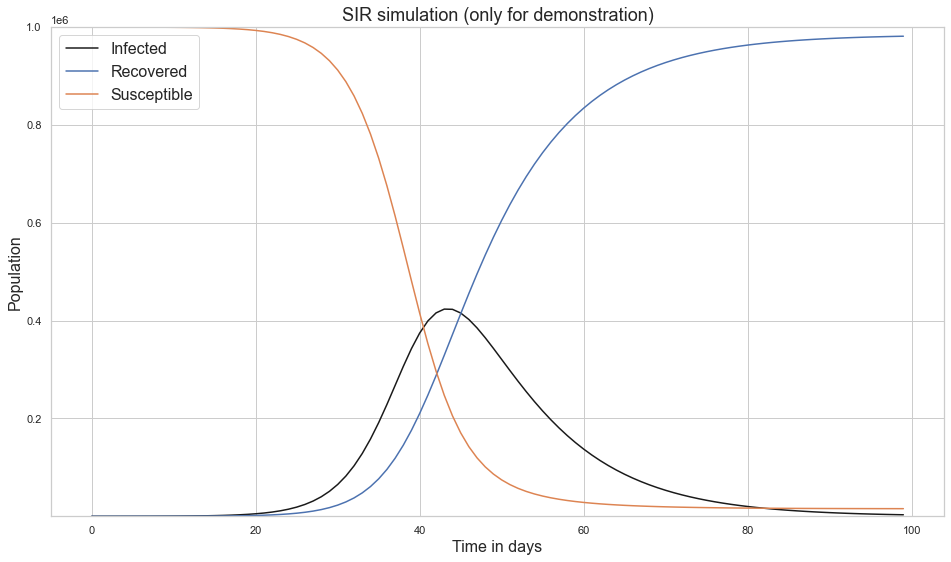

In [7]:
fig, ax1 = plt.subplots(1, 1)

ax1.plot(propagation_rates.index,propagation_rates.infected, label='Infected',color='k')
ax1.plot(propagation_rates.index,propagation_rates.recovered, label='Recovered')
ax1.plot(propagation_rates.index,propagation_rates.susceptible, label='Susceptible')

ax1.set_ylim(10, 1000000)
ax1.set_yscale('linear')
ax1.set_title('SIR simulation (only for demonstration)', size=18)
ax1.set_xlabel('Time in days', size=16)
ax1.set_ylabel('Population', size=16)
ax1.legend(loc='best',
           prop={'size': 16});

# Fitting data to a model

Goal is to fit a data model (SIR) model to obtain the parameters 1. beta and 2. gamma

Step 1 - Always start on simulative / constructive data <br>
Step 2 - Cross check if the innerlogic of your parameter fitting is correct <br>

In [8]:
def SIR_model_t(SIR,t,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        t: time step, mandatory for integral.odeint
        I: infected people
        R: recovered people
        beta: infection rate
        gamma: recovery rate
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          #S*I is the 
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return dS_dt,dI_dt,dR_dt

In [9]:
# the resulting curve has to be fitted
# free parameters are here beta and gamma

def fit_odeint(x, beta, gamma):
    '''
    helper function for the integration
    '''
    return integrate.odeint(SIR_model_t, (S0, I0, R0), t, args=(beta, gamma))[:,1] # we only would like to get dI

In [10]:
## fit the data set ydata, here the simulative data set of the infected curve

ydata = propagation_rates.infected
t=np.arange(len(ydata))

In [11]:
#ydata

In [12]:
popt, pcov = optimize.curve_fit(fit_odeint, t, ydata)
perr = np.sqrt(np.diag(pcov))
    
print('standard deviation errors : ',str(perr), ' start infect:',ydata[0])
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])

<ipython-input-8-80ce3711d14a>:17: RuntimeWarning: overflow encountered in double_scalars
  dS_dt=-beta*S*I/N0          #S*I is the
<ipython-input-8-80ce3711d14a>:18: RuntimeWarning: overflow encountered in double_scalars
  dI_dt=beta*S*I/N0-gamma*I
<ipython-input-8-80ce3711d14a>:19: RuntimeWarning: overflow encountered in double_scalars
  dR_dt=gamma*I
C:\Users\Dell\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


standard deviation errors :  [0.00087012 0.00074077]  start infect: 27.299823600000003
Optimal parameters: beta = 0.37337789054916876  and gamma =  0.09619940540430044


In [13]:
# get the final fitted curve
fitted=fit_odeint(t, *popt)

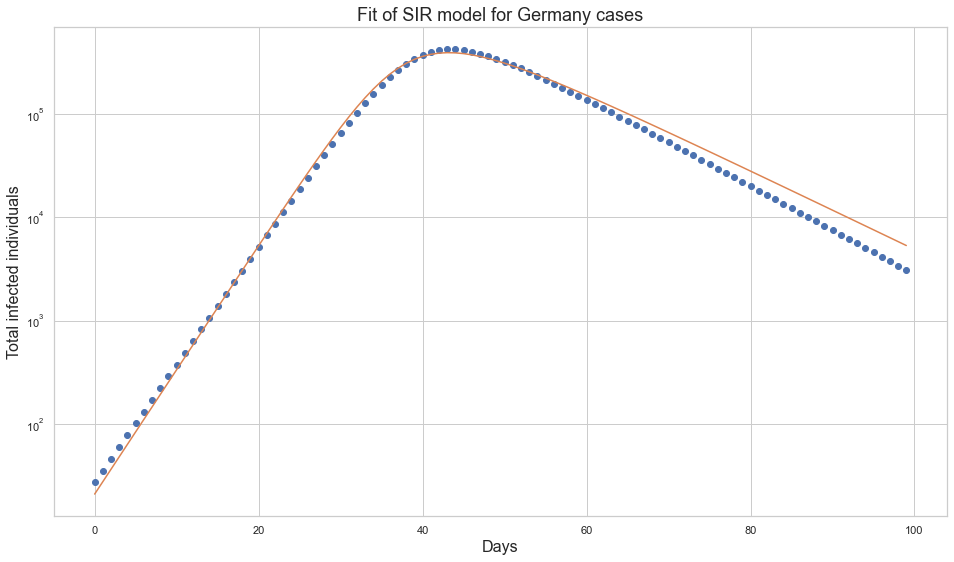

Optimal parameters: beta = 0.37337789054916876  and gamma =  0.09619940540430044
Basic Reproduction Number R0 = 3.8812910431198726
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible.
Source - wikipedia


In [14]:
plt.semilogy(t, ydata, 'o')
plt.semilogy(t, fitted)
#plt.semilogy(fitted)

plt.title("Fit of SIR model for Germany cases", size =18)
plt.ylabel("Total infected individuals", size =16)
plt.xlabel("Days", size =16)
plt.show()
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])
print("Basic Reproduction Number R0 =" , popt[0]/ popt[1])
print("This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible.")
print("Source - wikipedia")

# SIR Simulation - Dynamic Dashboard

In [15]:
## Merging all above steps and adding all the countries to the dashboard

In [16]:
df_country=df_analyse.columns
df_country = np.array(df_country.drop("date"))
#print(df_country)
df_country

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Gua

In [17]:
N0=1000000 # max susceptible population (approximate value)
beta=0.4   # infection rate/spread 
gamma=0.1  # recovery rate

df_data=df_analyse[58:]
t=np.arange(df_data.shape[0])
#print(df_data.columns[1:])
R0=0
    
for country in df_country: #df_data.columns[1:]:
    y_data=np.array(df_data[df_data[country]>0][country])
    t=np.arange(len(y_data))

    I0=y_data[0]
    S0=N0-I0
    popt=[0.4,0.1]
    fit_odeint(t, *popt)
    popt, pcov = optimize.curve_fit(fit_odeint, t, y_data, maxfev=10000)
    perr = np.sqrt(np.diag(pcov))
    fitted=fit_odeint(t, *popt)
    fitted_pad = np.concatenate((np.zeros(df_data.shape[0]-len(fitted)) ,fitted))
    df_data[country + '_fitted'] = fitted_pad

C:\Users\Dell\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
<ipython-input-17-ec6f55404543>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data[country + '_fitted'] = fitted_pad
<ipython-input-8-80ce3711d14a>:17: RuntimeWarning: overflow encountered in double_scalars
  dS_dt=-beta*S*I/N0          #S*I is the
<ipython-input-8-80ce3711d14a>:18: RuntimeWarning: overflow encountered in double_scalars
  dI_dt=beta*S*I/N0-gamma*I
C:\Users\Dell\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Illegal input detected (internal error). Run 

In [18]:
df_data = df_data.reset_index(drop=True)
df_data.to_csv('data/processed/SIR_fitted_curve.csv')           # save the data to local system
df_data

,date,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,...,Uruguay_fitted,Uzbekistan_fitted,Vanuatu_fitted,Venezuela_fitted,Vietnam_fitted,West Bank and Gaza_fitted,Winter Olympics 2022_fitted,Yemen_fitted,Zambia_fitted,Zimbabwe_fitted
0,2020-03-20,24,70,90,75,1,0,1,128,136,...,110.000000,33.000000,0.000000,42.000000,91.000000,47.000000,0.000000,0.000000,2.000000,1.000000
1,2020-03-21,24,76,139,88,2,0,1,158,160,...,110.954795,33.931332,0.000000,42.921690,91.806598,47.664237,0.000000,0.000000,2.021879,1.010144
2,2020-03-22,34,89,201,113,2,0,1,266,194,...,111.905369,34.888194,0.000000,43.861778,92.611770,48.335528,0.000000,0.000000,2.043994,1.020389
3,2020-03-23,40,104,230,133,3,0,3,301,235,...,112.851367,35.871241,0.000000,44.820545,93.415277,49.013875,0.000000,0.000000,2.066346,1.030738
4,2020-03-24,42,123,264,164,3,0,3,387,249,...,113.792428,36.881144,0.000000,45.798275,94.216880,49.699275,0.000000,0.000000,2.088938,1.041191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856,2022-07-24,184587,304890,266839,45326,102301,11,8736,9507562,424400,...,0.000794,0.000008,37.567411,0.000068,0.001906,0.002962,134.066596,0.964253,2.304613,6.939218
857,2022-07-25,184819,305123,266916,45326,102301,11,8736,9507562,425365,...,0.000780,0.000007,37.287322,0.000066,0.001876,0.002912,130.062023,0.950398,2.279912,6.874017
858,2022-07-26,185086,306789,267010,45326,102301,11,8741,9507562,425365,...,0.000767,0.000007,37.007953,0.000065,0.001846,0.002863,126.161876,0.936741,2.255472,6.809384
859,2022-07-27,185272,308050,267096,45326,102301,11,8741,9507562,425365,...,0.000754,0.000007,36.729327,0.000063,0.001817,0.002815,122.364394,0.923280,2.231288,6.745315


In [ ]:
# creating dashboard containig plotting of source and fitted SIR curve data for whole dataset
fig = go.Figure()
app = dash.Dash()
app.layout = html.Div([

    dcc.Markdown('''
    #  SIR Model Dashboard
    
    This SIR model presents the graph of acutal COVID-19 cases and predicted COVID-19 cases over the time. 
    
    '''),

    dcc.Markdown('''
    ## Select Country
    '''),
    dcc.Dropdown(
        id='country_drop_down',
        options=[ {'label': each,'value':each} for each in df_data.columns[1:200]],
        #options=[{'label': each,'value':each} for each in df_analyse.columns.unique()],
        value=['Germany'], # which are pre-selected
        multi=True
    ),
    dcc.Graph(figure=fig, id='main_window_slope')])


@app.callback(
    Output('main_window_slope', 'figure'),
    [Input('country_drop_down', 'value')])

def update_figure(country_list):
    v = 0
    my_yaxis={'type':"log",'title':'Confirmed'}
    traces = []
    for each in country_list:
        traces.append(dict(x=df_data['date'],
                           y=df_data[each],
                           mode='line',
                           name='Actual cases in '+each)
                     )
        
        traces.append(dict(x=df_data['date'],
                           y=df_data[each+'_fitted'],
                           mode='markers+lines',
                           name='Predicted cases in '+each)
                     )
        v = v+1

    return {
            'data': traces,
            'layout': dict (
                width=1280,
                height=720,
                xaxis={'title':'Time','tickangle':-45,'nticks':20,'tickfont':dict(size=14,color="#0c6887"),
                      },
                yaxis=my_yaxis
            )
    }

if __name__ == '__main__':
    app.run_server(debug=True, use_reloader=False)

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


# <p style="text-align: center;">Thank You!!!</p>